In [1]:
import numpy as np
import statistics
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
# def evaluate_models(X_train, y_train, X_test, y_test, models, params):
#     report = {}
    
#     for i in range(len(list(models))):
#         model = list(models.values())[i]
#         param = params[list(models.keys())[i]]
        
#         gs = GridSearchCV(model, param, cv=5)
#         gs.fit(X_train, y_train)
        
#         model.set_params(**gs.best_params_)
#         model.fit(X_train, y_train)
        
#         y_train_pred = model.predict(X_train)
#         y_test_pred = model.predict(X_test)
        
#         train_model_score = accuracy_score(y_train, y_train_pred)
#         test_model_score = accuracy_score(y_test, y_test_pred)
        
#         report[list(models.keys())[i]] = test_model_score
        
#     return report

# def get_best_model(report, models):
#     best_model_score = max(sorted(report.values()))
#     best_model_name = list(report.keys())[list(report.values()).index(best_model_score)]
#     best_model = models[best_model_name]
#     return best_model, best_model_name, best_model_score

In [15]:
df=pd.read_csv("South_German_Credit.csv")
# import os
# df1=pd.read_csv(os.path.join('artifacts','train.csv'))
# df2=pd.read_csv(os.path.join('artifacts','test.csv'))
# df1.columns

FileNotFoundError: [Errno 2] No such file or directory: 'artifacts\\train.csv'

In [14]:
num_columns=[feature for feature in df.columns if df[feature].dtypes != 'O']
cat_columns=[feature for feature in df.columns if df[feature].dtypes =='0']

cat_columns

[]

# Dealing with outliers

In [4]:
def find_anamolies(data):
    anomalies=[]
    
    random_data_std=statistics.stdev(data)
    random_data_mean=statistics.mean(data)
    
    anomaly_cut_off=random_data_std*3
    
    lower_limit=random_data_mean-anomaly_cut_off
    upper_limit=random_data_mean+anomaly_cut_off
    
    for outlier in data:
       if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
            
    return anomalies


In [5]:
list1=find_anamolies(df['duration'])
list1
len(list1)

14

In [6]:
df['age'].skew()

1.0247120249859745

In [7]:
df_age=np.log(df['age'])

In [8]:
df_age.skew()

0.4145758066521998

<Axes: xlabel='age', ylabel='Density'>

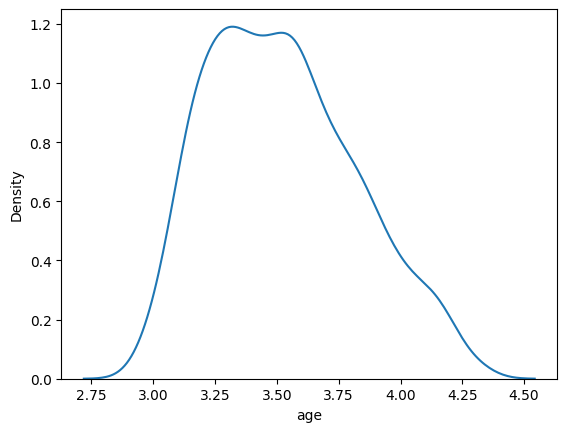

In [9]:
list11=find_anamolies(df_age)
sns.kdeplot(df_age)

1.0941841715555418

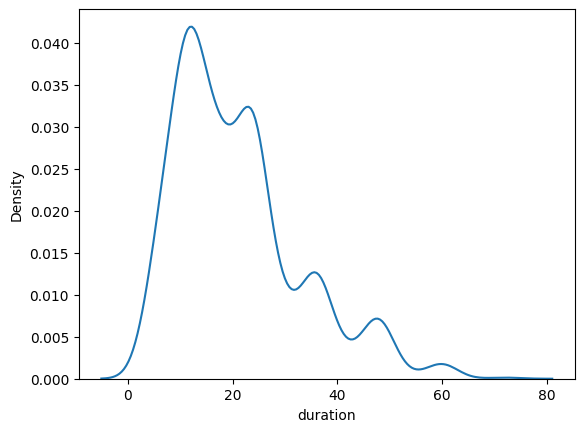

In [10]:
list2=find_anamolies(df['duration'])
sns.kdeplot(df['duration'])

df['duration'].skew()

<Axes: xlabel='duration', ylabel='Density'>

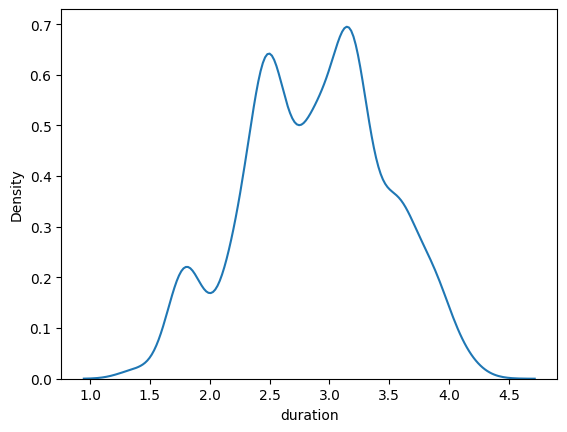

In [11]:
df_duration=np.log(df['duration'])
df_duration.skew()
find_anamolies(df_duration)
sns.kdeplot(df_duration)

In [12]:
list3=find_anamolies(df['amount'])

df['amount'].skew()

1.9495942869127831

In [13]:
len(list3)

25

In [14]:
df_amount=np.log(df['amount'])
list33=find_anamolies(df_amount)
df_duration.skew()

-0.12741444789193515

<Axes: xlabel='duration', ylabel='Density'>

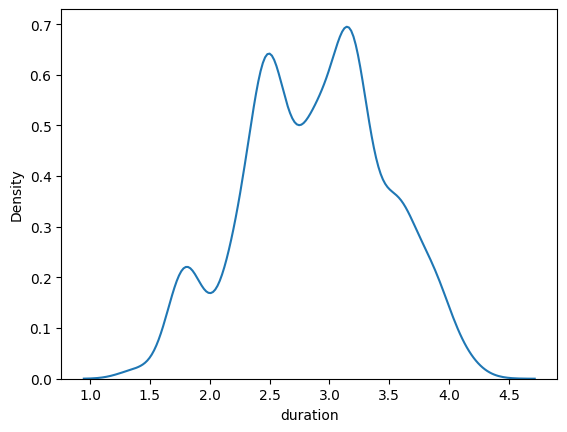

In [15]:
sns.kdeplot(df_duration)

<Axes: xlabel='age', ylabel='Density'>

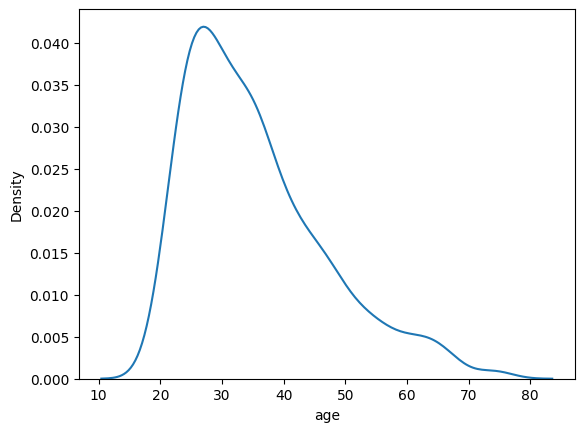

In [16]:
sns.kdeplot(df['age'])

In [17]:
# df=df.drop('people_liable',axis=1)
# df=df.drop('present_residence',axis=1)
# df=df.drop("telephone",axis=1)  
# df=df.drop("installment_rate",axis=1)  
# df=df.drop("other_debtors",axis=1)  
# df=df.drop("housing",axis=1) 
# df=df.drop("purpose",axis=1)  
# df=df.drop("job",axis=1)  

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [19]:
X=df.drop('credit_risk',axis=1)
y=df['credit_risk']

In [20]:
# df['number_credits'].skew()

In [21]:
# df_number_credits=np.log(df['number_credits'])



# list4=find_anamolies(df_number_credits)
# len(list4)

In [22]:
# df_number_credits.skew()
# sns.kdeplot(df_number_credits)

In [23]:
# df_number_credits.skew()


In [24]:
df['age']=df_age
df['amount']=df_amount
df['duration']=df_duration
# df['number_credits']=df_number_credits

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train.shape

(800, 20)

In [27]:
def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    results = []

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    results = []

    for name, model in models.items():
        param = params[name]
        gs = GridSearchCV(model, param, cv=5)
        gs.fit(X_train, y_train)

        best_model = gs.best_estimator_
        y_test_pred = best_model.predict(X_test)
        test_model_score = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='weighted')
        test_recall = recall_score(y_test, y_test_pred, average='weighted')
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        
        results.append({
            'Model': name,
            'Best Parameters': gs.best_params_,
            'Test Accuracy': test_model_score,
            'Precision': test_precision,
            'Recall': test_recall,
            'F1-Score': test_f1
        })

    # Convert the results into a DataFrame and sort by Test Accuracy in descending order
    results_df = pd.DataFrame(results)
    results_df.sort_values(by='Test Accuracy', ascending=False, inplace=True)
    
    return results_df

In [28]:
# def evaluate_models(X_train, y_train, X_test, y_test, models, params, cv_strategy):
#     results = []

#     for name, model in models.items():
#         param = params.get(name, {})  # Get parameters for the current model
#         gs = GridSearchCV(
#             estimator=model,
#             param_grid=param,
#             cv=cv_strategy,
#             n_jobs=-1,
#             scoring='accuracy',
#             error_score='raise'  # To raise errors and debug if needed
#         )
#         try:
#             gs.fit(X_train, y_train)
#             best_model = gs.best_estimator_
#             y_test_pred = best_model.predict(X_test)
#             test_model_score = accuracy_score(y_test, y_test_pred)
            
#             results.append({
#                 'Model': name,
#                 'Best Parameters': gs.best_params_,
#                 'Test Accuracy': test_model_score
#             })
#         except Exception as e:
#             print(f"An error occurred while processing {name}: {e}")
#             results.append({
#                 'Model': name,
#                 'Best Parameters': None,
#                 'Test Accuracy': None
#             })

#     # Convert the results into a DataFrame and sort by Test Accuracy in descending order
#     results_df = pd.DataFrame(results)
#     results_df.sort_values(by='Test Accuracy', ascending=False, inplace=True)
    
#     return results_df


In [29]:
# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:


params = {
    "Logistic Regression": {
    'C': [0.1, 1.0, 10.0]
        },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None]
        },
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, None]
        },
    "Gradient Boosting": {
        'learning_rate': [0.01, 0.1, 0.05],
        'n_estimators': [50, 100, 200]
        },
    "SVM": {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['linear', 'rbf']
        },
    "XGBoost": {
        'learning_rate': [0.01, 0.1, 0.05],
        'n_estimators': [50, 100, 200]
        },
    "CatBoost": {
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.1, 0.05],
        'iterations': [30, 50, 100]
        },
    "AdaBoost": {
        'learning_rate': [0.01, 0.1, 0.05],
        'n_estimators': [50, 100, 200],
        'algorithm': ['SAMME', 'SAMME.R'] 
        }
    }
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.ensemble._weight_boosting")

model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models, params)
    
print("Model Evaluation Report:")
print(model_report_df)

# Getting the best model from the report
best_model_name = model_report_df.iloc[0]['Model']
best_model_score = model_report_df.iloc[0]['Test Accuracy']
best_params = model_report_df.iloc[0]['Best Parameters']
    
print(f"\nBest Model: {best_model_name} with an accuracy of {best_model_score}")
print(f"Best Model Parameters: {best_params}")
    
# Refit the best model with its best parameters
best_model = models[best_model_name].set_params(**best_params)
best_model.fit(X_train, y_train)
    
print("\nClassification Report on Test Set:")
print(classification_report(y_test, best_model.predict(X_test)))

Model Evaluation Report:
                 Model                                    Best Parameters  \
6             CatBoost  {'depth': 6, 'iterations': 100, 'learning_rate...   
0  Logistic Regression                                         {'C': 0.1}   
1        Random Forest             {'max_depth': 20, 'n_estimators': 200}   
4                  SVM                    {'C': 10.0, 'kernel': 'linear'}   
5              XGBoost         {'learning_rate': 0.1, 'n_estimators': 50}   
7             AdaBoost  {'algorithm': 'SAMME.R', 'learning_rate': 0.1,...   
3    Gradient Boosting        {'learning_rate': 0.1, 'n_estimators': 100}   
2        Decision Tree        {'criterion': 'entropy', 'max_depth': None}   

   Test Accuracy  Precision  Recall  F1-Score  
6          0.760   0.752856   0.760  0.755104  
0          0.755   0.742260   0.755  0.738686  
1          0.755   0.742434   0.755  0.740723  
4          0.755   0.742434   0.755  0.740723  
5          0.745   0.733571   0.745  0.73

In [31]:
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Random Forest": RandomForestClassifier(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
#     "SVM": SVC(),
#     "XGBoost": XGBClassifier(),
#     "CatBoost": CatBoostClassifier(verbose=False),
#     "AdaBoost": AdaBoostClassifier(),
#     }

# params = {
#     "Logistic Regression": [
#         {
#             'C': [0.1, 1.0, 10.0],
#             'penalty': ['l1', 'l2', 'elasticnet'],  # Specify the penalties
#             'solver': ['saga'],  # 'saga' supports all three penalties
#             'max_iter': [100, 200],
#             'l1_ratio': [0.1, 0.5, 0.7, 1.0]  # Only applicable for 'elasticnet'
#         },
#         {
#             'C': [0.1, 1.0, 10.0],
#             'penalty': ['l1', 'l2'],  # Only use solvers that support l1 and l2 without l1_ratio
#             'solver': ['liblinear'],
#             'max_iter': [100, 200],
#         }
#     ],
#     "Random Forest": {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [10, 20, None],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'bootstrap': [True, False]
#     },
#     "Decision Tree": {
#         'criterion': ['gini', 'entropy'],
#         'max_depth': [10, 20, None],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     },
#     "Gradient Boosting": {
#         'learning_rate': [0.01, 0.1, 0.05],
#         'n_estimators': [50, 100, 200],
#         'subsample': [0.8, 1.0],
#         'max_features': [ 'sqrt', 'log2' , None]
#     },
#     "SVM": {
#         'C': [0.1, 1.0, 10.0],
#         'kernel': ['linear', 'rbf'],
#         'gamma': ['scale', 'auto']
#     },
#     "XGBoost": {
#         'learning_rate': [0.01, 0.1, 0.05],
#         'n_estimators': [50, 100, 200],
#         'max_depth': [3, 5, 7],
#         'subsample': [0.8, 1.0],
#         'colsample_bytree': [0.8, 1.0]
#     },
#     "CatBoost": {
#         'depth': [6, 8, 10],
#         'learning_rate': [0.01, 0.1, 0.05],
#         'iterations': [30, 50, 100],
#         'l2_leaf_reg': [3, 5, 7],
#         'border_count': [32, 64, 128]
#     },
#     "AdaBoost": {
#         'learning_rate': [0.01, 0.1, 0.05],
#         'n_estimators': [50, 100, 200],
#         'algorithm': ['SAMME', 'SAMME.R']
#     }
# }

# strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models, params, strat_k_fold)
    
# print("Model Evaluation Report:")
# print(model_report_df)

# # Getting the best model from the report
# best_model_name = model_report_df.iloc[0]['Model']
# best_model_score = model_report_df.iloc[0]['Test Accuracy']
# best_params = model_report_df.iloc[0]['Best Parameters']
    
# print(f"\nBest Model: {best_model_name} with an accuracy of {best_model_score}")
# print(f"Best Model Parameters: {best_params}")
    
#     # Refit the best model with its best parameters
# best_model = models[best_model_name].set_params(**best_params)
# best_model.fit(X_train, y_train)
    
# print("\nClassification Report on Test Set:")
# print(classification_report(y_test, best_model.predict(X_test)))

In [46]:
for i in df.columns:
    columns=[]
    outlier=find_anamolies(df[i])
    if outlier is None :
        continue
    else:
        columns+=[outlier]
        
    
    print(columns)

[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[]]
[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]]
[[]]
[[]]
[[]]
[[]]
[[4, 4, 4, 4, 4, 4]]
[[]]
[[]]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
[[]]


<Axes: xlabel='number_credits', ylabel='Density'>

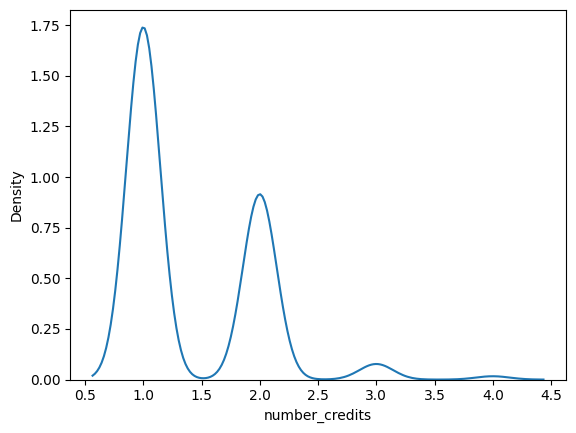

In [47]:
sns.kdeplot(df['number_credits'])

In [79]:
df['number_credits'].skew()


1.272575967002092

In [41]:
df_number_credits=np.log(df['number_credits'])



list4=find_anamolies(df_number_credits)
len(list4)

6

<Axes: xlabel='number_credits', ylabel='Density'>

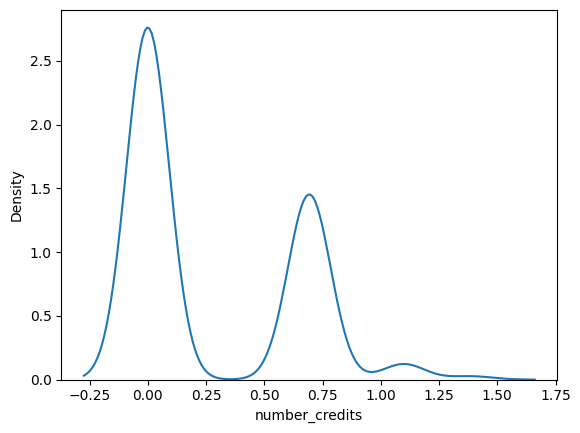

In [37]:
df_number_credits.skew()
sns.kdeplot(df_number_credits)

In [51]:
df_number_credits.skew()


0.7703653473507064

3.264248775770769

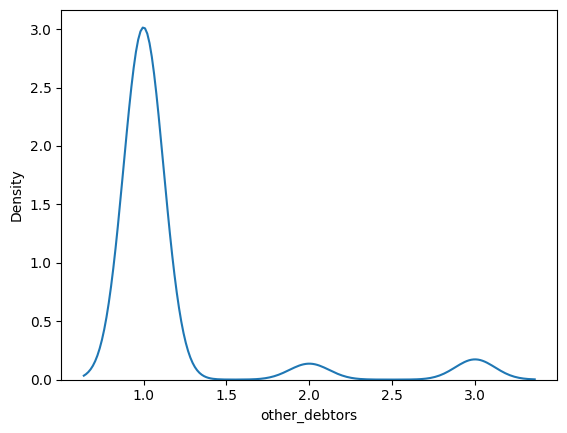

In [45]:
sns.kdeplot(df['other_debtors'])
df['other_debtors'].skew()

In [47]:
list5=find_anamolies(df['other_debtors'])


df_other_debtors=np.log(df['other_debtors'])

len(list5)

52

3.048292724757048

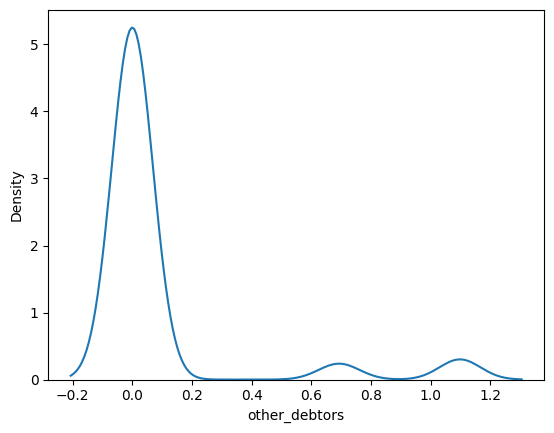

In [52]:
list55=find_anamolies(df_other_debtors)
len(list55)

sns.kdeplot(df_other_debtors)

df_other_debtors.skew()

c:\Users\shelk\OneDrive\Desktop\German_Bank_Credit\venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='foreign_worker', ylabel='Density'>

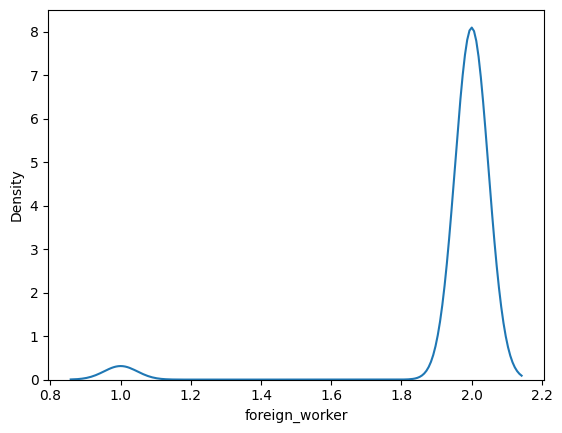

In [30]:
sns.kdeplot(df['foreign_worker'])           

In [12]:
models={
    "Logistic_Regression" : LogisticRegression(),
    "Random_Forest_Classifier" : RandomForestClassifier(),
    "AdaBoost_Classifier" : AdaBoostClassifier(),
    "CatBoost_Classifier" : CatBoostClassifier(),
    "XGB_Classifier" : XGBClassifier(),
    "Support_Vector_Classifer " : SVC(),
    "Gradient_Boosting_Classifier" : GradientBoostingClassifier(),
    "DecisionTree_Classifier" : DecisionTreeClassifier()
    }

params = {
        "Logistic Regression": {
            'C': [0.1, 1.0, 10.0]
        },
        "Random Forest": {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None]
        },
        "Decision Tree": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [10, 20, None]
        },
        "Gradient Boosting": {
            'learning_rate': [0.01, 0.1, 0.05],
            'n_estimators': [50, 100, 200]
        },
        "SVM": {
            'C': [0.1, 1.0, 10.0],
            'kernel': ['linear', 'rbf']
        },
        "XGBoost": {
            'learning_rate': [0.01, 0.1, 0.05],
            'n_estimators': [50, 100, 200]
        },
        "CatBoost": {
            'depth': [6, 8, 10],
            'learning_rate': [0.01, 0.1, 0.05],
            'iterations': [30, 50, 100]
        },
        "AdaBoost": {
            'learning_rate': [0.01, 0.1, 0.05],
            'n_estimators': [50, 100, 200]
        }
    }

model_report = evaluate_models(X_train, y_train, X_test, y_test, models, params)
best_model, best_model_name, best_model_score = get_best_model(model_report, models)

print(f"Best Model: {best_model_name} with accuracy of {best_model_score}")
print(f"Best Model Parameters: {best_model.get_params()}")
print("Classification Report on Test Set:")
print(classification_report(y_test, best_model.predict(X_test)))

KeyError: 'Logistic_Regression'

In [10]:
params = {
        "Logistic Regression": {
            'C': [0.1, 1.0, 10.0]
        },
        "Random Forest": {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None]
        },
        "Decision Tree": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [10, 20, None]
        },
        "Gradient Boosting": {
            'learning_rate': [0.01, 0.1, 0.05],
            'n_estimators': [50, 100, 200]
        },
        "SVM": {
            'C': [0.1, 1.0, 10.0],
            'kernel': ['linear', 'rbf']
        },
        "XGBoost": {
            'learning_rate': [0.01, 0.1, 0.05],
            'n_estimators': [50, 100, 200]
        },
        "CatBoost": {
            'depth': [6, 8, 10],
            'learning_rate': [0.01, 0.1, 0.05],
            'iterations': [30, 50, 100]
        },
        "AdaBoost": {
            'learning_rate': [0.01, 0.1, 0.05],
            'n_estimators': [50, 100, 200]
        }
    }

In [11]:
model_report = evaluate_models(X_train, y_train, X_test, y_test, models, params)
best_model, best_model_name, best_model_score = get_best_model(model_report, models)

KeyError: 'Logistic_Regression'

In [13]:
print(f"Best Model: {best_model_name} with accuracy of {best_model_score}")
print(f"Best Model Parameters: {best_model.get_params()}")
print("Classification Report on Test Set:")
print(classification_report(y_test, best_model.predict(X_test)))

NameError: name 'best_model_name' is not defined

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

def evaluate_models(X_train, y_train, X_test, y_test, models, params):
    results = []

    for name, model in models.items():
        param = params[name]
        gs = GridSearchCV(model, param, cv=5)
        gs.fit(X_train, y_train)

        best_model = gs.best_estimator_
        y_test_pred = best_model.predict(X_test)
        test_model_score = accuracy_score(y_test, y_test_pred)
        
        results.append({
            'Model': name,
            'Best Parameters': gs.best_params_,
            'Test Accuracy': test_model_score
        })

    # Convert the results into a DataFrame and sort by Test Accuracy in descending order
    results_df = pd.DataFrame(results)
    results_df.sort_values(by='Test Accuracy', ascending=False, inplace=True)
    
    return results_df

# Example usage
if __name__ == "__main__":
    # Load and prepare your dataset
    df = pd.read_csv('South_German_Credit.csv')
    X = df.drop('credit_risk', axis=1)
    y = df['credit_risk']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the dataset
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "SVM": SVC(),
        "XGBoost": XGBClassifier(),
        "CatBoost": CatBoostClassifier(verbose=False),
        "AdaBoost": AdaBoostClassifier(),
    }

    params = {
        "Logistic Regression": {
            'C': [0.1, 1.0, 10.0]
        },
        "Random Forest": {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None]
        },
        "Decision Tree": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [10, 20, None]
        },
        "Gradient Boosting": {
            'learning_rate': [0.01, 0.1, 0.05],
            'n_estimators': [50, 100, 200]
        },
        "SVM": {
            'C': [0.1, 1.0, 10.0],
            'kernel': ['linear', 'rbf']
        },
        "XGBoost": {
            'learning_rate': [0.01, 0.1, 0.05],
            'n_estimators': [50, 100, 200]
        },
        "CatBoost": {
            'depth': [6, 8, 10],
            'learning_rate': [0.01, 0.1, 0.05],
            'iterations': [30, 50, 100]
        },
        "AdaBoost": {
            'learning_rate': [0.01, 0.1, 0.05],
            'n_estimators': [50, 100, 200]
        }
    }

    model_report_df = evaluate_models(X_train, y_train, X_test, y_test, models, params)
    
    print("Model Evaluation Report:")
    print(model_report_df)

    # Getting the best model from the report
    best_model_name = model_report_df.iloc[0]['Model']
    best_model_score = model_report_df.iloc[0]['Test Accuracy']
    best_params = model_report_df.iloc[0]['Best Parameters']
    
    print(f"\nBest Model: {best_model_name} with an accuracy of {best_model_score}")
    print(f"Best Model Parameters: {best_params}")
    
    # Refit the best model with its best parameters
    best_model = models[best_model_name].set_params(**best_params)
    best_model.fit(X_train, y_train)
    
    print("\nClassification Report on Test Set:")
    print(classification_report(y_test, best_model.predict(X_test)))


c:\Users\shelk\OneDrive\Desktop\German_Bank_Credit\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\shelk\OneDrive\Desktop\German_Bank_Credit\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\shelk\OneDrive\Desktop\German_Bank_Credit\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\shelk\OneDrive\Desktop\German_Bank_Credit\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

Model Evaluation Report:
                 Model                                    Best Parameters  \
0  Logistic Regression                                         {'C': 0.1}   
4                  SVM                    {'C': 10.0, 'kernel': 'linear'}   
1        Random Forest             {'max_depth': 20, 'n_estimators': 200}   
6             CatBoost  {'depth': 6, 'iterations': 100, 'learning_rate...   
5              XGBoost         {'learning_rate': 0.1, 'n_estimators': 50}   
7             AdaBoost        {'learning_rate': 0.1, 'n_estimators': 200}   
3    Gradient Boosting        {'learning_rate': 0.1, 'n_estimators': 100}   
2        Decision Tree          {'criterion': 'entropy', 'max_depth': 20}   

   Test Accuracy  
0          0.755  
4          0.755  
1          0.750  
6          0.750  
5          0.745  
7          0.745  
3          0.735  
2          0.715  

Best Model: Logistic Regression with an accuracy of 0.755
Best Model Parameters: {'C': 0.1}

Classification R